In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

plt.rcParams.update({'font.size': 32})

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI3 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI3")

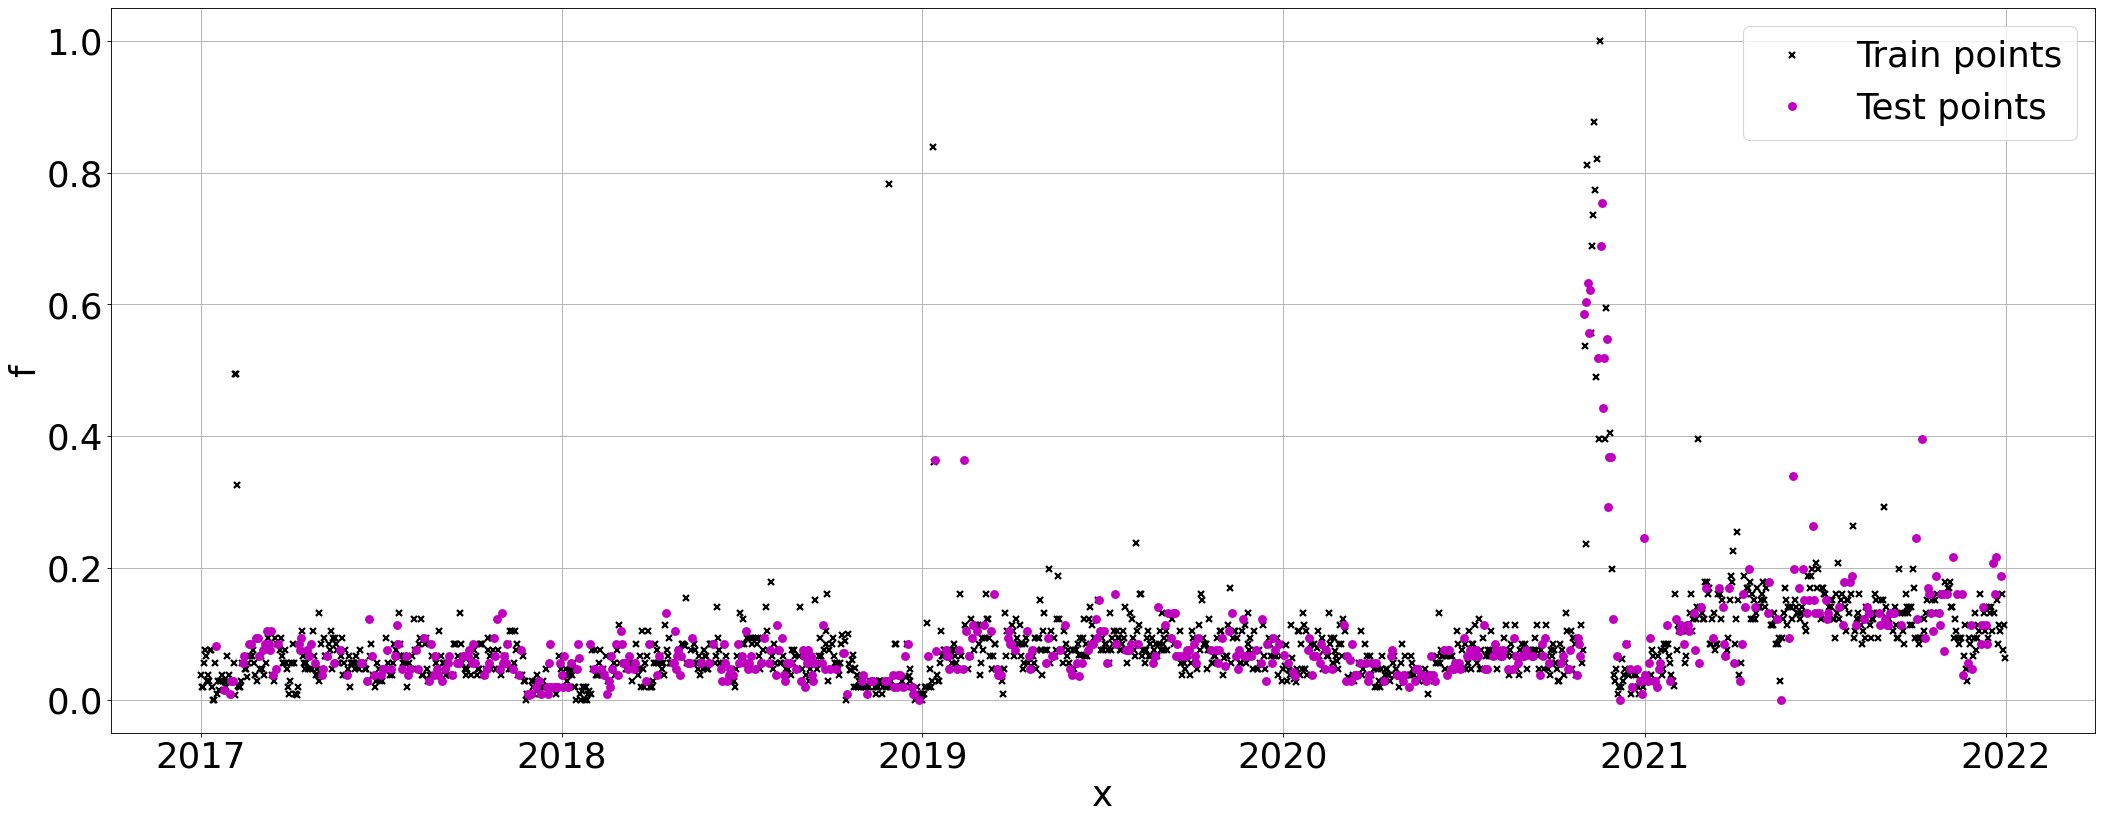

In [3]:
# X = np.array(DKI1.Tanggal.astype('int64') // 10**9)
X = np.array(DKI3.index).reshape(-1,1)
# X = np.array(DKI1['Tanggal']).reshape(-1,1)
Y = np.array(DKI3['NO2']).reshape(-1,1)

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI3['Tanggal'].loc[train_X.flatten()]).reshape(-1,1), train_Y, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI3['Tanggal'].loc[test_X.flatten()]).reshape(-1,1), test_Y, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

In [4]:
k = GPy.kern.Exponential(1)
m = GPy.models.GPRegression(train_X, train_Y, k)
m.optimize(messages=1, ipython_notebook=True)

In [5]:
m

GP_regression.,value,constraints,priors
Exponential.variance,0.012570859506990287,+ve,
Exponential.lengthscale,58.0528510558702,+ve,
Gaussian_noise.variance,0.0020898732216190954,+ve,


In [6]:
# Denormalisasi
max = 107.0
min = 1.0
test_Y_denorm = (test_Y.flatten() * (max - min) + min)
prediksi_denorm = (m.predict(test_X)[0].flatten() * (max - min) + min)

In [7]:
date = np.array(DKI3['Tanggal'].loc[test_X.flatten()])
d = {"Tanggal":date, "NO2":test_Y_denorm, "Prediksi":prediksi_denorm}
DKI3_Prediction = pd.DataFrame(d)
DKI3_Prediction = DKI3_Prediction.sort_values(by=['Tanggal'])
DKI3_Prediction

,Tanggal,NO2,Prediksi
399,2017-01-16,9.6,3.771466
111,2017-01-24,2.6,4.511141
32,2017-01-30,2.0,7.741183
208,2017-01-31,4.0,8.787525
235,2017-02-02,4.0,12.096936
...,...,...,...
532,2021-12-13,10.0,13.513067
7,2021-12-19,23.0,14.023551
309,2021-12-21,18.0,13.997559
495,2021-12-22,24.0,13.897281


In [8]:
# Penyimpanan Data Prediksi
DKI3_Prediction.to_excel('./Data/Prediction/DKI3_05_NO2.xlsx', index=False)